In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

# Question and answer

## Câu hỏi: Sự chệch lệch giữa lượng mua và lượng bán như thế nào đến giá mở cửa ngày hôm sau
+ Xem sự thay đổi của giá cổ phiếu
+ Lượng mua thay đổi như thế nào lượng bán thay đổi như thế nào trong khoảng từ đầu cuối năm 2021 đến nay
+ Xem thử trong vòng 2 tháng gần nhất thì lượng mua và bán ảnh hưởng như thế nào đến giá cả

### 1: Đọc file " data-csv/trading_statistics.csv "

In [3]:
df=pd.read_csv("data-csv/trading_statistics.csv")
df.head(10)

,Unnamed: 0,date,close_price,trading_buy_count,trading_buy_volume,trading_sell_count,trading_sell_volume,buy_sell_difference,auction_volume,auction_value (1000VND)
0,0,2022-11-29,11.50,846,1887274,566,1591113,296161,1589500,17847256
1,1,2022-11-28,10.50,200,642101,93,104014,538087,103700,1080750
2,2,2022-11-25,9.60,280,1031136,175,290597,740539,289900,2781999
3,3,2022-11-24,8.80,434,1520313,361,751935,768378,751400,6141733
4,4,2022-11-23,8.00,314,891007,360,803363,87644,642500,5334003
5,5,2022-11-22,8.40,456,1316263,372,1138198,178065,1137500,9498125
6,6,2022-11-21,7.70,349,994127,195,411643,582484,410900,3142859
7,7,2022-11-18,7.00,470,2164096,396,1395008,769088,1394200,9218785
8,8,2022-11-17,6.40,312,1329726,219,881422,448304,880900,5605422
9,9,2022-11-16,5.90,399,1211485,325,957036,254449,956200,4966264


2: Xử lý dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3263 non-null   int64  
 1   date                     3263 non-null   object 
 2   close_price              3263 non-null   float64
 3   trading_buy_count        3263 non-null   int64  
 4   trading_buy_volume       3263 non-null   int64  
 5   trading_sell_count       3263 non-null   int64  
 6   trading_sell_volume      3263 non-null   int64  
 7   buy_sell_difference      3263 non-null   int64  
 8   auction_volume           3263 non-null   int64  
 9   auction_value (1000VND)  3263 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 255.0+ KB


Cột date có dạng object ta chuyển qua datetime64s

In [5]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

### Sự thay đổi giá cổ phiếu
+ Lấy dữ liệu
+ Trực quan dữ liệu

Xem sự phân bố dữ liệu
+ Gía cổ phiếu tập trung chủ yếu ở khoảng 20-40
+ Các giá từ 80 trở lên có nhưng ít chúng ta sẽ xem tại sao

<AxesSubplot: xlabel='close_price', ylabel='Count'>

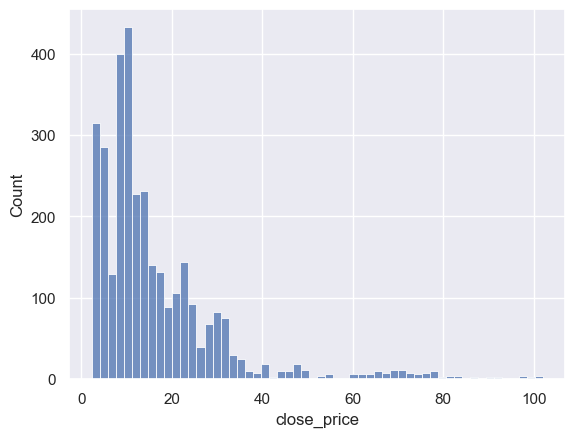

In [16]:
sns.histplot(df['close_price'])

Trực quan sự thay đổi giá cổ phiếu

In [18]:
df=df.set_axis(df['date'])

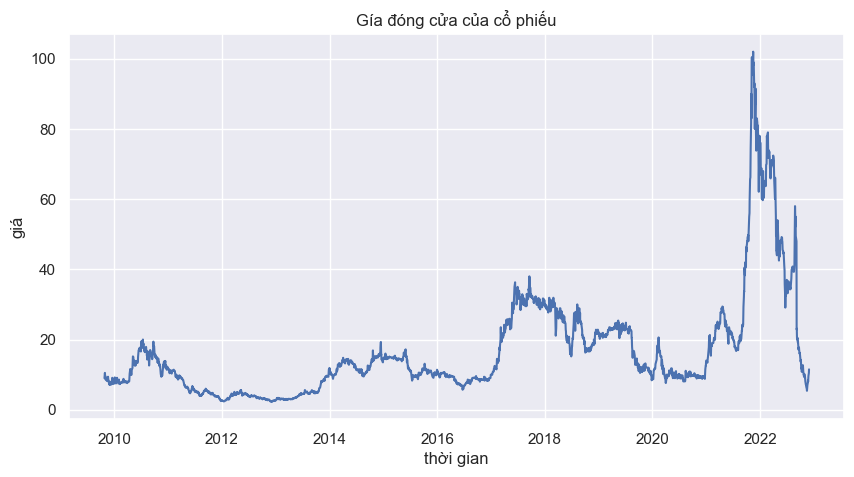

In [24]:
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(df['close_price'])
ax.set_title('Gía đóng cửa của cổ phiếu')
ax.set_xlabel('thời gian')
ax.set_ylabel('giá');

Nhìn vào biểu đồ có thể thấy từ năm 2010 đến năm 2017 thì giá trung bình ở khoảng 18 và năm 2017 đến 2020 thì giá trung bình tăng lên khoảng 30 và giá tăng đột biến ở đoạn cuối năm 2021 và đầu năm 2022 và giảm mạnh nên ở biểu đồ trên ta chỉ thấy mức giá cao có số lượng rất ít

###  Lượng mua thay đổi như thế nào lượng bán thay đổi như thế nào trong khoảng từ đầu cuối năm 2021 đến nay

### Xử lý dữ liệu

In [40]:
mask_2021=(df['date'].dt.to_period('M')=='2021-10')|(df['date'].dt.to_period('M')=='2021-11')|(df['date'].dt.to_period('M')=='2021-12')
df_2021_2022=df[(df['date'].dt.year==2022)|mask_2021]

trực quan sự phân thay đổi giá cả từ cuối 2021 đến nay

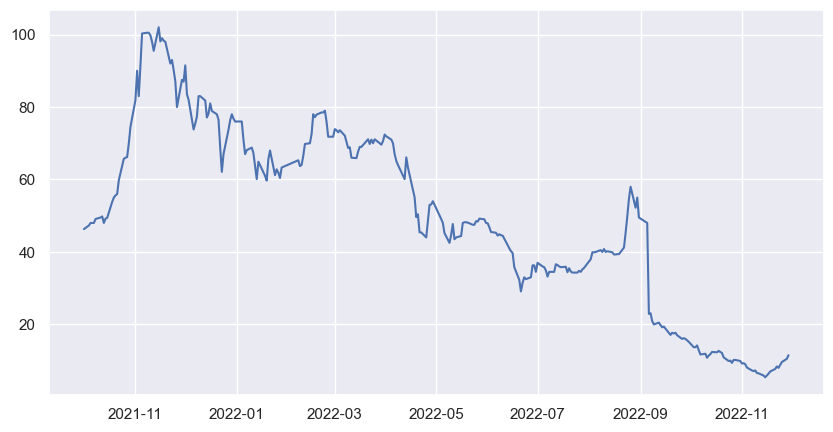

In [43]:
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(df_2021_2022['close_price']);

Xem sự thay đổi chêch lệch giá như thế nào trong năm 2022

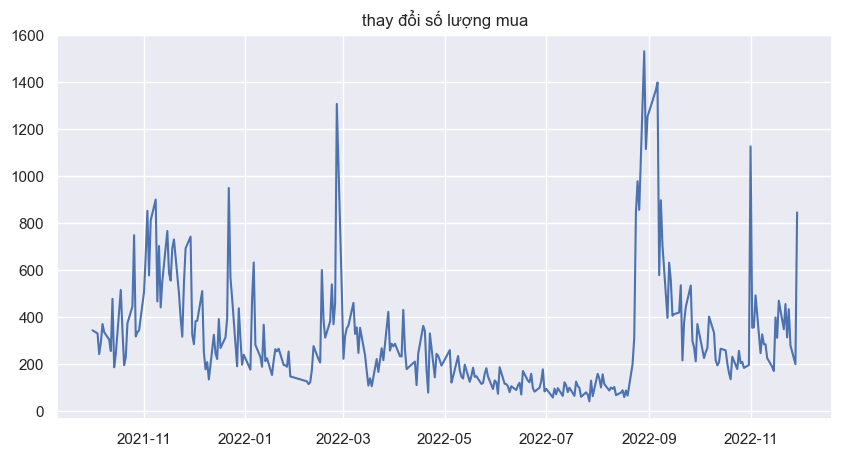

In [46]:
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(df_2021_2022['trading_buy_count'])
ax.set_title('thay đổi số lượng mua');

trực quan sự thay đổi số lượng bán

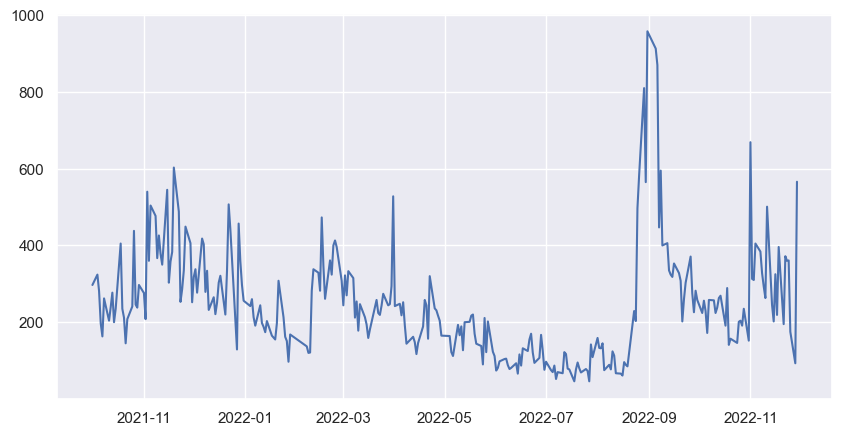

In [48]:
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(df_2021_2022['trading_sell_count'])
ax.set_title('thay đổi số lượng bán');

Nhìn không khác gì nhau

### Xem thử trong vòng 2 tháng gần nhất thì lượng mua và bán ảnh hưởng như thế nào đến giá cả

#### Xử lý dữ liệu

In [64]:
mask_2_month=(df['date'].dt.to_period('M')=='2022-10')|(df['date'].dt.to_period('M')=='2022-11')
df_2_month=df[mask_2_month]
buy=df_2_month['trading_buy_count']
sell=df_2_month['trading_sell_count']

Trực quan hóa

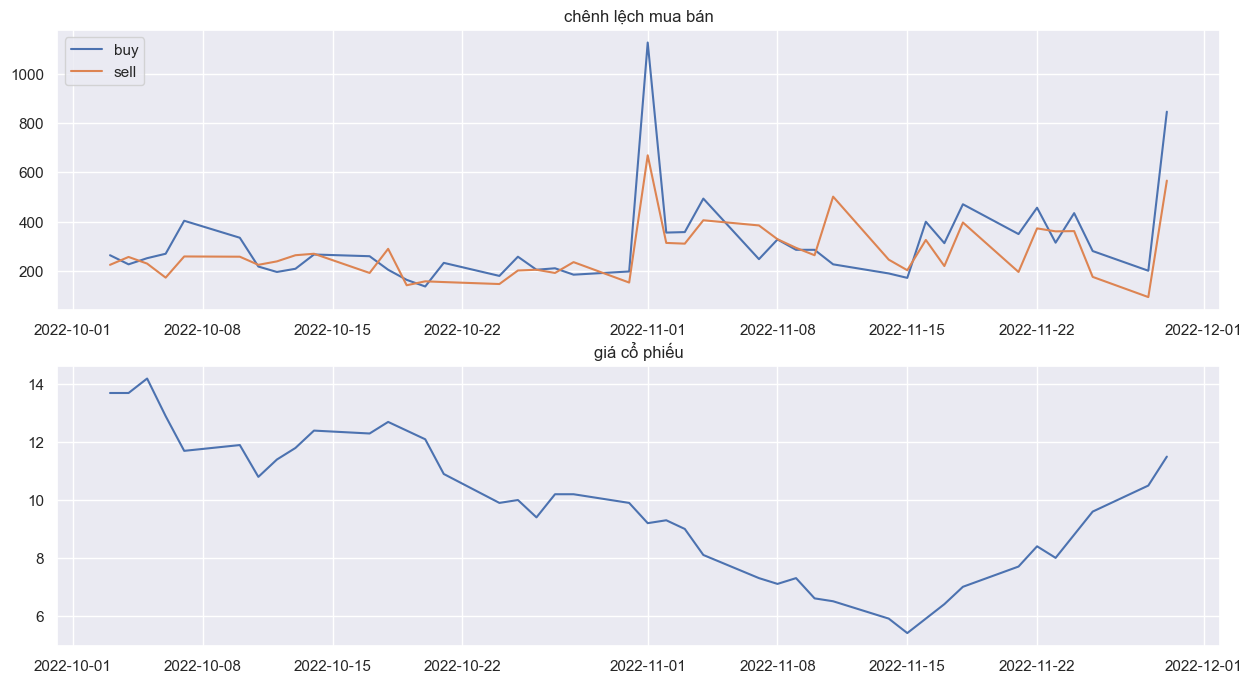

In [79]:
fig, ax=plt.subplots(nrows=2,
                    ncols=1,
                    figsize=(15,8))
ax[0].plot(buy,label='buy')
ax[0].plot(sell,label='sell')
ax[1].plot(df_2_month['close_price'])
ax[0].set_title('chênh lệch mua bán')
ax[1].set_title('giá cổ phiếu')
ax[0].legend(loc='upper left');

Nhìn vào biểu đồ có thể thấy thì trong vòng 2 tháng qua khi mà lượng mua ít hơn lượng bán chứng tỏ cổ phiểu có khả năng thanh khoảng kém nên sẽ làm giá cổ phiếu giảm